___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# **Data-Science Project - Major Banks Stocks Exploratory Analysis From The Yahoo Finance API**

**Time Period Focused Upon: [Financial Crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) All The Way Upto Early 2016.**

## **Data Ingestion / Recieving The Data From The API**

In [100]:
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yfin
yfin.pdr_override()
%matplotlib inline

**Get stocks information for the following banks:**
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Stock data is collected from the API from dates 'Jan 1st 2006' to 'Jan 1st 2016' for each of these banks. Steps to obtain the individual dataframes for each bank are given below:**
1. Use datetime to set start and end datetime objects.
2. Find the ticker symbol for each bank.
2. Use **datareader** to grab info on the stock.

**[Pandas Datareader Documentation Page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)**

### **Self-Reminder: Make sure to check the documentation page for latest working API in the future, "yahoo" API may not always work.**

## **Data Preparation**

In [69]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [70]:
# Could also do this for a Panel Object
# Bank of America
BAC = data.get_data_yahoo("BAC", start='2006-01-01', end='2016-01-01')
# CitiGroup
C = data.get_data_yahoo("C", start='2006-01-01', end='2016-01-01')
# Goldman Sachs
GS = data.get_data_yahoo("GS", start='2006-01-01', end='2016-01-01')
# JPMorgan Chase
JPM = data.get_data_yahoo("JPM", start='2006-01-01', end='2016-01-01')
# Morgan Stanley
MS = data.get_data_yahoo("MS", start='2006-01-01', end='2016-01-01')
# Wells Fargo
WFC = data.get_data_yahoo("WFC", start='2006-01-01', end='2016-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Create A List Of The Ticker Symbols Associated With The Banks In Alphabetical Order, And Call This List  'tickers'.**

In [71]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Step-1: Use 'pd.concat()' To Concatenate The Bank DataFrames Together To A Single DataFrame Called "bank_stocks". Set The "keys" Argument Equal To The 'tickers' List. Pay Heed To The Axis Concatenated Upon.**

In [142]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Step-2: Set the column name levels:**

In [143]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Step-3: Check The .head() Of The "bank_stocks" DataFrame.**

In [144]:
bank_stocks.head() # Data Collected In Desired Format <--

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  33.170311  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.818043  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.860302  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.810989  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.832130  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.607502  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.631245  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.726212  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.761803  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.129787  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.849190  11016400  
2006-01-04   31.530001  19.618961  10870000  
2006-01-05   31.495001  19.597178  10158000  
2006-01-06   31.680000  19.712292   8403800  
2006-01-09   31.674999  19.709175   5619600  

[5 rows x 36 columns]

## **Exploratory Data Analysis: Calculating Returns Of Stocks**

**[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).**

In [78]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Step-1: Create A New Empty DataFrame Called 'returns'. This DataFrame Will Contain The Returns For Each Bank's Stock. Returns Are Defined By The Formula:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [80]:
returns = pd.DataFrame()

**Step-2: For Each Bank Stock Ticker, Create A "returns" Column Entry And Set It As A Column In The "returns" DataFrame.**

In [82]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Step-3: Creating A Pair-Plot Using Seaborn Of The Returns DataFrame (The Stocks Of Citigroup Bank Stand Out Upon Observation).**

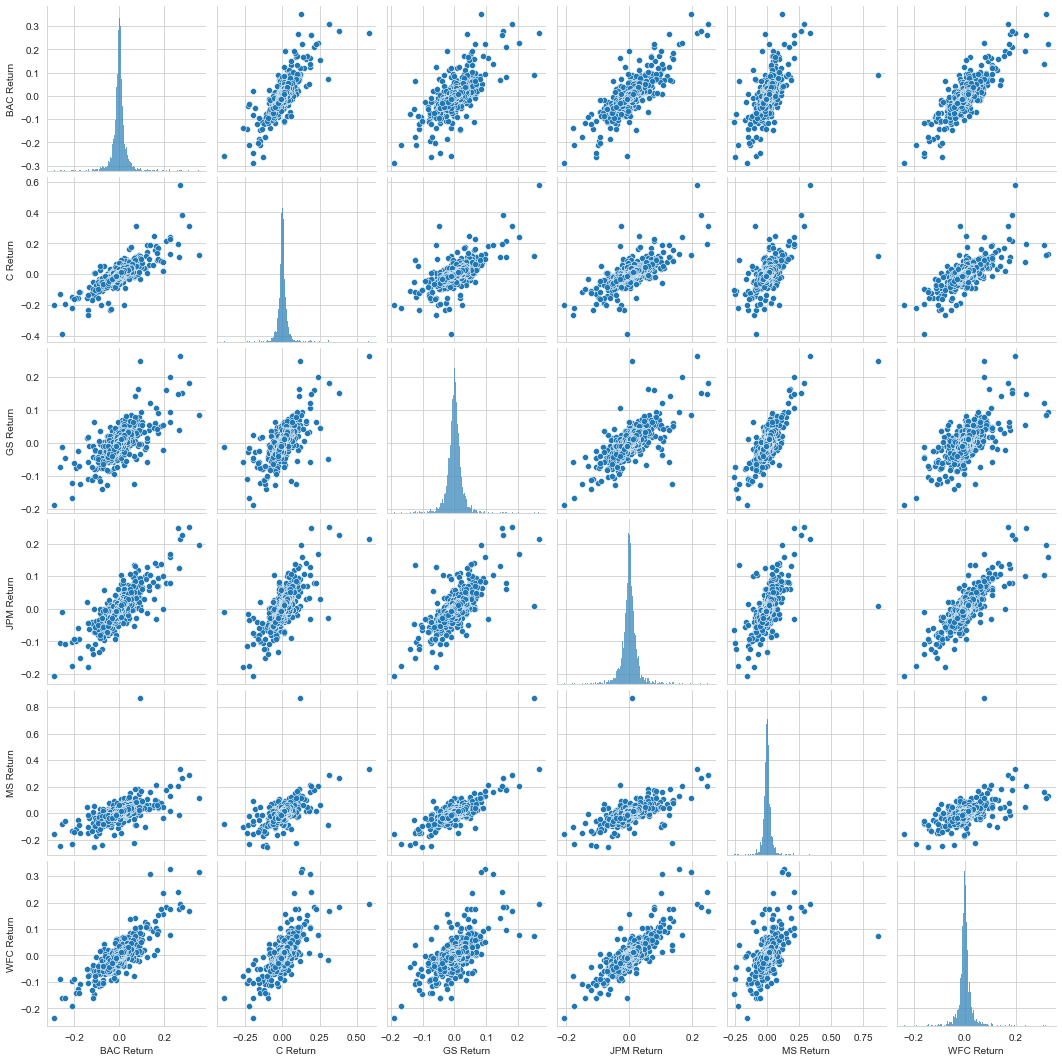

In [145]:
#returns[1:]
sns.pairplot(returns[1:])

**Step-4: Using The "returns" DataFrame, Figure Out On What Dates Each Bank's Stocks Had The Best And Worst Single Day Returns.**

**Observation: Four Of The Banks Share The Same Day For The Worst Drop.**

**Reason Of Behavioural Similarity: [Citigroup's Stock Crash Data](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29)**

In [88]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [89]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Citigroup's Largest Drop And Biggest Gain Were Very Close To One Another.**

**Reason Of Behavioural Pattern: [Citigroup Had A Stock Split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)**

**Finding Out The Riskiest Stock Investment Based Upon The Standard Deviation Of The Returns.**

In [146]:
returns.std() # Citigroup Is Deemed As The Riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [93]:
returns["2015-01-01":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Step-5: Creating A Distplot Using Seaborn Of The 2015 Returns For Morgan Stanley.**

<AxesSubplot:xlabel='MS Return', ylabel='Density'>

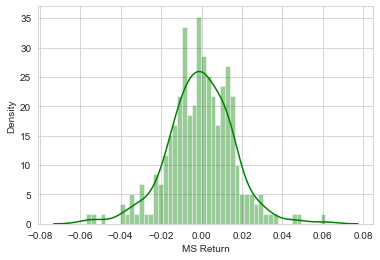

In [105]:
sns.distplot(a=returns["2015-01-01":"2015-12-31"]['MS Return'],bins=50,color='green')

**Step-6: Creating A Distplot Using Seaborn Of The 2008 Returns For Citigroup.**

<AxesSubplot:xlabel='C Return', ylabel='Density'>

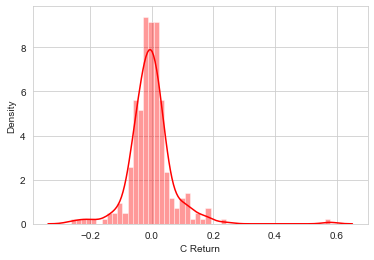

In [108]:
sns.distplot(a=returns["2008-01-01":"2008-12-31"]['C Return'],bins=50,color='red')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Step-7: Creating A Line Plot Showing Close Price For Each Bank For The Entire Index Of Time.**

**[.xs(Cross Section)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) To Get A Cross-Section Of The Data.**

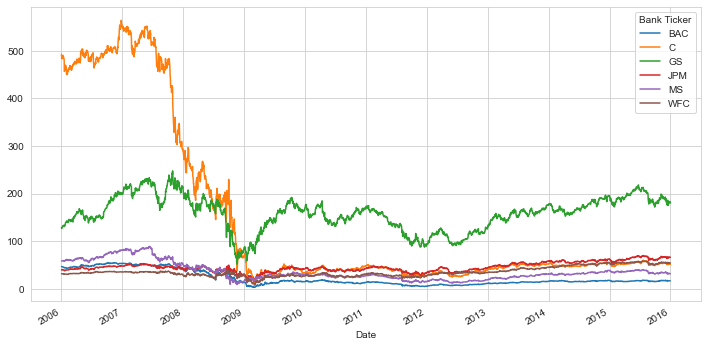

In [120]:
byClose = bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

In [121]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

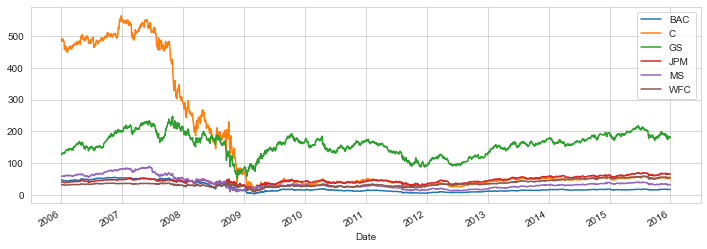

In [122]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

## **Moving Averages**

Calculating The Moving Averages In The Year **2008**. 

**Step-1: Plotting The Rolling 30 Day Average Against The Close Price For Bank Of America's Stock For The Year 2008.**

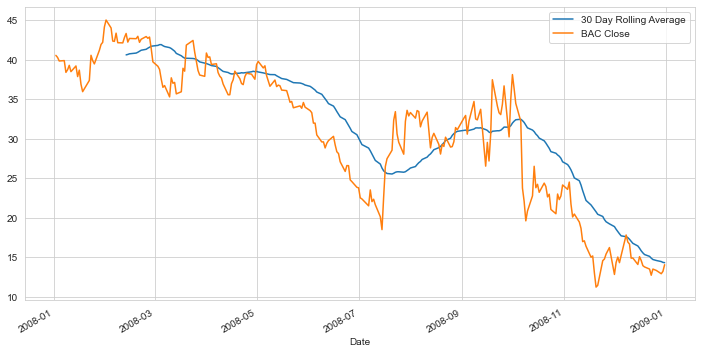

In [130]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 Day Rolling Average')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

**Step-2: Creating A Heatmap Of The Correlation Between The Stocks' Close Prices.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

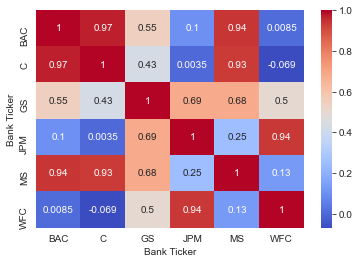

In [137]:
sns.heatmap(data=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)

**Step-3: Creating A Clustermap Of The Correlation Between The Stocks' Close Prices.**

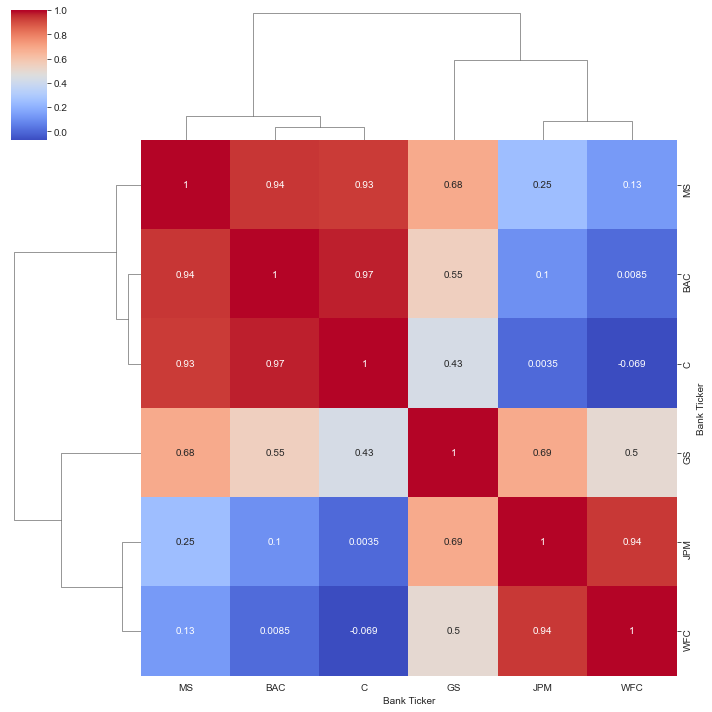

In [141]:
sns.clustermap(data = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)